In [1]:
import sys
import os
# path_to_dmcalc = '../lzdev/code/dmcalc/install/python/'
path_to_dmcalc = os.getenv('HOME') +'/dmcalc/install/python/'
sys.path.append(path_to_dmcalc)
import pydmcalc as dm
import numpy as np
import matplotlib.pyplot as plt


import itertools

In [2]:
core = 3480
mantle = 2867
depth = 4850/5280 *1.609
radius = core + mantle + 32
cosine_core =  ( 1- (core/(radius - depth))**2)**.5
cosine_mantle =  (1-((6346)/(radius - depth))**2)**.5

mass = 1e16


In [4]:
radii = np.r_[1:radius]
mass = 1e17
# xsection = 1e-31* (131)**4
xsection = dm.SICrossSection(mass, 1e-17)
# xsection.cutoff = True
shield = dm.Overburden(xsection, depth, True)
shield.get_log_atten(1, mass)
plt.figure(dpi = 150)
density = np.array([shield.density_g_cm3(r) for r in radii])
plt.plot(radii, density)
# plt.xlim(5000, 6000)
# rmin = np.argwhere(np.diff(density)>0)[0][0]
# plt.xlim(rmin-10, radius)
# plt.ylim(1, 3.5)
plt.xlabel('Radius [km]', fontsize = 14)
plt.ylabel('Density [g/cm$^3$]', fontsize = 14)
plt.title('PREM Density Profile', fontsize = 18)
plt.grid()

In [3]:
from scipy.special import *

-0.03560265225257706

In [4]:
mass = 1e17
xsection = dm.SICrossSection(mass, 1e-17)
shm = dm.HaloSHM()
shm.mass_GeV = mass
halo = dm.OverburdenSpectrum(shm, xsection)


rate = dm.RateWimp(dm.Target.Create("Xe"), halo, )

energies = np.r_[:100]
halo.rescale_energies(1)
plt.semilogy(energies, rate.get_rate(energies), label = 'Cos$\Theta$=1')
halo.rescale_energies(.1)
plt.semilogy(energies, rate.get_rate(energies), label = 'Cos$\Theta$=.1')
halo.rescale_energies(0.01)
plt.semilogy(energies, rate.get_rate(energies), label = 'Cos$\Theta$=.01')
plt.legend()
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Recoil Rate [1/keV/ton/year]')

Text(0, 0.5, 'Recoil Rate [1/keV/ton/year]')

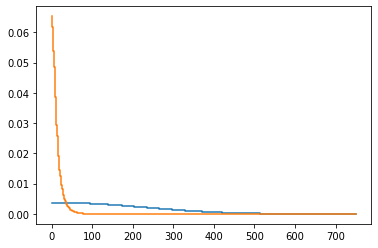

In [25]:
halo.rescale_energies(-0.01)
velocities = np.r_[0:750:500*1j]

pdf = np.array([shm.integral_s_km(v) for v in velocities])
plt.step(velocities, pdf)
pdf = np.array([halo.integral_s_km(v) for v in velocities])
plt.step(velocities, pdf)
# plt.xlim(0,25)
# plt.ylim(0,.01)
# np.sum(pdf)
# plt.axvline(5)
# plt.xlim(300,400)

In [5]:
xsection.mass_GeV = 5

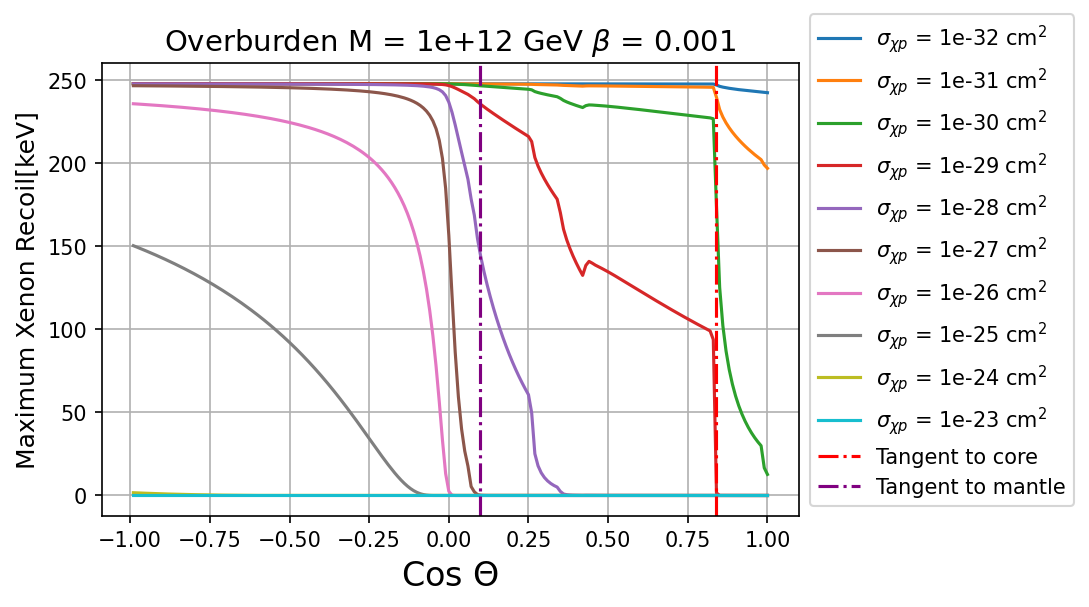

In [7]:
plt.figure(dpi=150)
mass = 1e12

plt.gca().grid(which = 'both')
# mass = 1e14
xsection = 1e-31* (131)**4
xsection = dm.SIBlobCrossSection(mass, 1e-31,0)
# xsection.cutoff = True
shield = dm.Overburden(xsection, depth, True)

angles = np.r_[-1:1:1e-2]
for sigma in np.logspace(-32, -23, 10):
#     xsection.scale = sigma
#     shield.contact_xsection_cm2 = sigma 
#     shield2.contact_xsection_cm2 = sigma 
    xsection.scale = sigma
    shield.get_log_atten(0, mass) #just to clear the cache
#     xsection2.scale = sigma
    attens = np.array([shield.get_log_atten(angle, .5*mass) for angle in angles])
    l =plt.plot(-1*angles, 2*124* np.exp(attens) , label = '$\sigma_{\chi p}$ = %g cm$^2$'%(sigma))


plt.axvline(cosine_core, color = 'r', ls = '-.', label = 'Tangent to core')
plt.axvline(cosine_mantle, color = 'g', ls = '-.', label = 'Tangent to mantle', c = 'purple')
# plt.ylim(1,300)
# plt.xlim(0.75, 0.85)
plt.xlabel("Cos $\Theta$", fontsize = 16)
plt.ylabel("Maximum Xenon Recoil[keV]", fontsize = 12)
plt.title(r'Overburden M = %.g GeV $\beta$ = %.3f'%(mass, 1e-3), fontsize = 14)
plt.legend(fontsize = 10, bbox_to_anchor=(1., 0),loc = 'lower left')

In [60]:

plt.figure(dpi=150)


plt.gca().grid(which = 'both')
mass = 1e16
xsection = 1e-31* (131)**4
xsection = dm.SIBlobCrossSection(mass, 1e-31, 0)
shield = dm.Overburden(xsection, depth, True)
shield.contact_xsection_cm2 = 1e-31 * 131**4
mass = 1e17
# xsection = 1e-31* (131)**4
xsection2 = dm.SIBlobCrossSection(mass, 1e-31, 0)
shield2 = dm.Overburden(xsection, depth, True)
shield2.contact_xsection_cm2 = 1e-31 * 131**4

angles = np.r_[-1:1:1e-2]
for sigma in np.logspace(-20, -16, 5):
#     xsection.scale = sigma
#     shield.contact_xsection_cm2 = sigma 
#     shield2.contact_xsection_cm2 = sigma 
    xsection.scale = sigma
    xsection2.scale = sigma
    attens = np.array([shield.get_log_atten(angle, .5*mass) for angle in angles])
    l =plt.plot(-1*angles, 2*124* np.exp(attens) , label = '$\sigma_{\chi T}$ = %g cm$^2$'%(shield.contact_xsection_cm2))
    
    attens = np.array([shield2.get_log_atten(angle, .5*mass) for angle in angles])
    plt.plot(-1*angles, 2*124* np.exp(attens) , label = '$\sigma_{\chi T}$ = %g cm$^2$'%(shield2.contact_xsection_cm2), ls = '--', 
            color = l[0].get_color())

plt.axvline(cosine_core, color = 'r', ls = '-.', label = 'Tangent to core')
plt.axvline(cosine_mantle, color = 'g', ls = '-.', label = 'Tangent to mantle', c = 'purple')
plt.ylim(1,300)
# plt.xlim(0.75, 0.85)
plt.xlabel("Cos $\Theta$", fontsize = 16)
plt.ylabel("Maximum Xenon Recoil[keV]", fontsize = 12)
plt.title(r'Overburden M = %.g GeV $\beta$ = %.3f'%(mass, 1e-3), fontsize = 14)
plt.legend(fontsize = 10, bbox_to_anchor=(1., 0),loc = 'lower left')

In [204]:
angles = np.r_[-1:1:180*1j]
mass = 1e12
shm = dm.HaloSHM()
velocities = np.r_[10:750: 256*1j]
scales = np.logspace(-32, -19, 53, endpoint = True)
masses = np.logspace(8, 17, 37, endpoint = True)
# xsection = dm.SICrossSection(mass, 1e-24)
xsection = dm.SIBlobCrossSection(mass, 1e-21,0)
energies = .5*mass*1e6*(velocities[::-1]/3e5)**2
dv = velocities[1] - velocities[0]
# xsection.cutoff = False
f_v =  shm.velocity_pdf(velocities-dv/2)
shield = dm.Overburden(xsection, depth, True)

In [207]:
from IPython.display import clear_output

In [208]:
%%time
import warnings
weights = []
parameter_space = itertools.product(masses, scales)
n=0
for mass,scale in  parameter_space:
    if (n%100 ==0):
        clear_output(wait = True)
        print(f'{n} / {len(scales)*len(masses)}')
    n+=1
    xsection.scale = scale
    shield.mass_GeV = mass
    xsection.mass_GeV = mass
    params = itertools.product( .5*mass*1e6*(velocities[::-1]/3e5)**2,angles)
    attens = .5*np.array([shield.get_log_atten(angle,energy) for  energy,angle in params])
    attens = attens.reshape(len(velocities), len(angles)).T
    attens = attens[:, ::-1]
    
    atten_velocities = np.exp(attens)*velocities
    mask = atten_velocities >= velocities[0]
    window = np.argmax(mask,axis =1)
    stopped = np.argwhere(np.all(~mask, axis = 1)).flatten()
    window[stopped] = atten_velocities.shape[1]
    not_stopped  = np.argwhere(np.any(mask, axis = 1)).flatten()
    if(len(not_stopped)==0):
        gv2 = np.zeros(atten_velocities.shape)
        gv2[:,0] = 1/dv
        weights.append(gv2)
        continue
    overflow = np.array([np.sum(f_v[:idx]) for idx in window])
     
    with warnings.catch_warnings():
        warnings.filterwarnings('error')
        try:
            g_v = dv*np.array([f_v[idx:]/np.diff(atten_velocities[k,idx:], prepend=0) for k,idx in zip(not_stopped, window[not_stopped])], dtype = 'object')
        except:
            print("Unexpected error:", sys.exc_info()[0])
            print(mass, scale)
            print (window)
#             problems = np.argwhere(np.diff)
            print(atten_velocities[0])
            break
    gv2 = np.zeros(atten_velocities.shape)
    gv2[not_stopped, :] = np.array([np.interp(velocities, atten_velocities[k,idx:], g.astype(float)) for g, k, idx in zip(g_v, not_stopped, window[not_stopped])])
    gv2[:,0] += overflow
    integral = np.sum(gv2, axis =1)*dv
    gv2 /= integral[:, np.newaxis]
    weights.append(gv2)
weights = np.array(weights).reshape(len(masses), len(scales), len(angles), len(velocities))
np.savez('weights.npz', spectrum = weights, masses = masses, scales = scales, angles = angles, velocities = velocities-dv/2)

1900 / 1961
CPU times: user 36min 15s, sys: 1.8 s, total: 36min 17s
Wall time: 36min 22s


Text(0, 0.5, 'f(v) [s/km]')

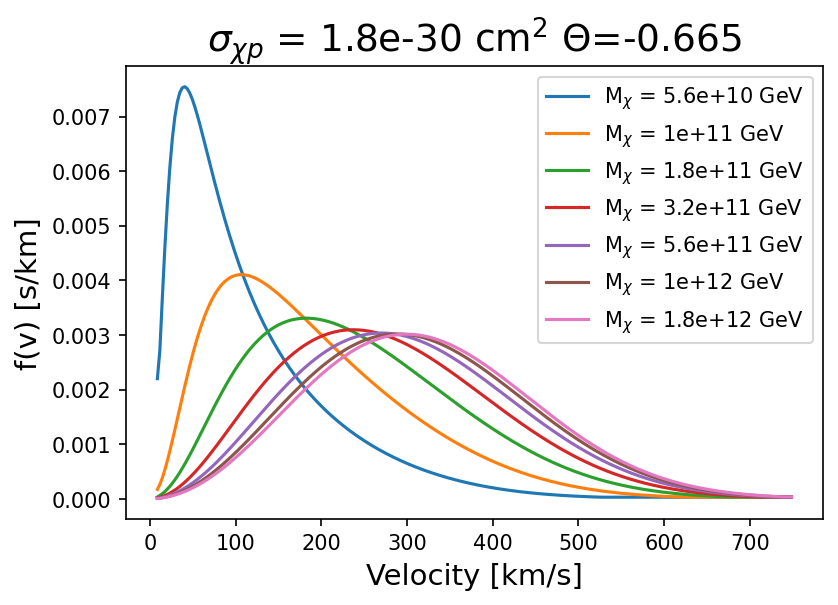

In [217]:
# weights2 = weights.reshape(len(masses), len(scales), len(angles), len(velocities))
plt.figure(figsize = (6,4), dpi = 150)
for i in range(11, 18):
    plt.plot(velocities-dv/2, weights[i,9,30,:], label = f'M$_\chi$ = {masses[i]:.2g} GeV')

plt.legend()
plt.title(f'$\sigma_{{\chi p}}$ = {scales[9]:.2g} cm$^2$ ${{\Theta}}$={angles[30]:.3f}', fontsize = 18)
plt.xlabel('Velocity [km/s]', fontsize = 14)
plt.ylabel('f(v) [s/km]', fontsize = 14)

In [35]:
dv = velocities[1] - velocities[0]
weights = []
for scale in  scales:
    print(scale)
    xsection.scale = scale
    params = itertools.product( .5*mass*1e6*(velocities[::-1]/3e5)**2,angles)
    attens = .5*np.array([shield.get_log_atten(angle,energy) for  energy,angle in params])
    attens = attens.reshape(len(velocities), len(angles)).T
    attens = attens[:, ::-1]
    atten_velocities = np.exp(attens)*velocities
    mask = atten_velocities >= velocities[0]
    g_v = dv*np.array([f_v/np.diff(av, append = 751) for av in atten_velocities])
    gv2 = np.array([np.interp(velocities, av, g) for av,g in zip(atten_velocities, g_v)])
    integral = np.sum(gv2, axis =1)*dv
    gv2 /= integral[:, np.newaxis]
    weights.append(gv2)
weights = np.array(weights)

1e-31
1e-30
1e-29
1e-28


<ipython-input-35-519d33830ee1>:12: RuntimeWarning: divide by zero encountered in true_divide
  g_v = dv*np.array([f_v/np.diff(av, append = 751) for av in atten_velocities])


1e-27


<ipython-input-35-519d33830ee1>:12: RuntimeWarning: overflow encountered in true_divide
  g_v = dv*np.array([f_v/np.diff(av, append = 751) for av in atten_velocities])


1e-26


<ipython-input-35-519d33830ee1>:12: RuntimeWarning: overflow encountered in multiply
  g_v = dv*np.array([f_v/np.diff(av, append = 751) for av in atten_velocities])


1e-25
1e-24
1e-23
1e-22


In [89]:

plt.imshow(weights[4,9, ::-1, ::-1].T, extent = (angles[0], angles[-1],velocities[0]-dv/2, velocities[-1]-dv/2), aspect = 'auto', cmap =  'rainbow')
# plt.plot(velocities,weights[-3, 45, :])
# plt.plot(velocities,weights[-7, 45, :])

In [38]:
from scipy.signal import fftconvolve

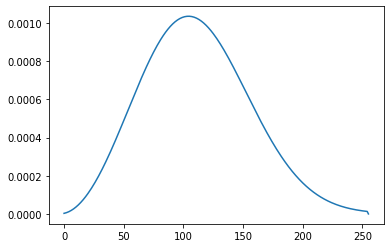

In [13]:
## angles = np.r_[-1:1:180*1j]
mass = 1e12
shm = dm.HaloSHM()
velocities = np.r_[10:750: 256*1j]
scales = np.logspace(-31, -21, 11)
# xsection = dm.SICrossSection(mass, 1e-24)
xsection = dm.SIBlobCrossSection(mass, 1e-31,0)
energies = .5*mass*1e6*(velocities[::-1]/3e5)**2
# xsection.cutoff = False
f_v =  shm.velocity_pdf(velocities)
shield = dm.Overburden(xsection, depth, True)
a = np.array([shield.get_log_atten(angles[-3],energy) for  energy in energies])[::-1]

atten_velocities =  np.exp(a) * velocities
plt.plot( f_v/np.diff(atten_velocities, append = 700))

In [ ]:
shield.get_log_atten(angles[50],energy)

In [4]:
xsection.scale = 1e-32
angles = np.r_[-1:1:1e-2]
energies = .5*mass*np.r_[.5:1:.01]
params = itertools.product(angles, energies)


array([            nan,             nan,             nan, ...,
       -2.37855814e-13, -2.37000877e-13, -2.36263622e-13])

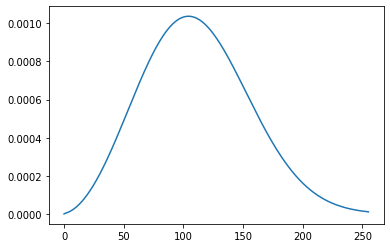

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [19]:
plt.figure(dpi = 150)
i = 30
threshold = 3e5 * (2* 131*.937e6)**-.5
idx = np.argmax(velocities > threshold)
plt.pcolor(angles[:], velocities,weights[i,:,:].T / weights[i,:,:].max(axis = 1), shading = 'auto', cmap = 'rainbow')
plt.axhline(threshold, color = 'black')
plt.xlabel('cos (Zenith)')
plt.ylabel('Velocity [km/s]')
cbar = plt.colorbar()
cbar.set_label('Probability Density amplitude')
plt.title(r'M/$\sigma_{N\chi}$ = %.3g GeV/ cm$^2$ / c$^2$'%(mass/scales[i]))

IndexError: index 30 is out of bounds for axis 0 with size 10

<Figure size 900x600 with 0 Axes>

In [16]:
from scipy.integrate import simps

In [407]:
simps(weights[:,:, :], velocities[:],axis = 2)

array([[9.97044559e-01, 9.97044559e-01, 9.97044559e-01, ...,
        9.97044559e-01, 9.97044559e-01, 9.97044559e-01],
       [9.97044559e-01, 9.97044559e-01, 9.97044559e-01, ...,
        9.97044559e-01, 9.97044559e-01, 9.97044559e-01],
       [9.97044559e-01, 9.97044559e-01, 9.97044559e-01, ...,
        9.97044558e-01, 9.97044558e-01, 9.97044558e-01],
       ...,
       [9.97008952e-01, 9.97008859e-01, 9.97008739e-01, ...,
        2.00722008e-04, 2.00722010e-04, 2.00722013e-04],
       [9.97008952e-01, 9.97008859e-01, 9.97008739e-01, ...,
        2.00722008e-04, 2.00722010e-04, 2.00722013e-04],
       [9.97008952e-01, 9.97008859e-01, 9.97008739e-01, ...,
        2.00722008e-04, 2.00722010e-04, 2.00722013e-04]])

In [101]:
2* (131e6*.937)*(20/3e5)**2

1.0910844444444445

In [154]:
masses

array([1.00000000e+10, 3.45510729e+10, 1.19377664e+11, 4.12462638e+11,
       1.42510267e+12, 4.92388263e+12, 1.70125428e+13, 5.87801607e+13,
       2.03091762e+14, 7.01703829e+14, 2.42446202e+15, 8.37677640e+15,
       2.89426612e+16, 1.00000000e+17])

In [151]:
plt.figure(dpi = 150)
for dmmass,model in zip(masses[::2], weights[::2]):
    survival = np.mean(np.sum(model[:,:,5:], axis = 2)*dv, axis = 1)
    plt.loglog(scales, survival, label = f' M$_\chi$={dmmass:.2g} GeV')
# # survival[0]
# for k in range(25, 33):
#     plt.semilogy(angles, survival[k, :], label = '$\sigma$ = %.3g cm$^2$'%(scales[k]))
plt.grid()
plt.legend(fontsize = 8)
plt.title(f'Survival Curves')
plt.ylabel('Acceptance (1 keV)')
plt.xlabel('$\sigma_{N\chi}$ [cm$^2$]')

Text(0.5, 0, '$\\sigma_{N\\chi}$ [cm$^2$]')

In [26]:
plt.figure(dpi = 150)
survival = simps((1- (idx/np.r_[idx:weights.shape[2]])**2)*weights[:,:, idx:], velocities[idx:],axis = 2)/.997044
acceptance = survival.mean(axis = 1)
# survival[0]
plt.semilogx(scales, acceptance, label = 'M = {}'.format(mass))
weights = weights*np.exp(.1)
survival = simps((1- (idx/np.r_[idx:weights.shape[2]])**2)*weights[:,:, idx:], velocities[idx:],axis = 2)/.997044
acceptance = survival.mean(axis = 1)
plt.semilogx(scales, acceptance, label = 'M = {}'.format(mass))
plt.legend(fontsize = 8)
plt.title('Overgurden Curves')
plt.ylabel('Acceptance (1 keV)')
plt.xlabel('$\sigma_{N\chi}$ [cm$^2$]')

Text(0.5, 0, '$\\sigma_{N\\chi}$ [cm$^2$]')

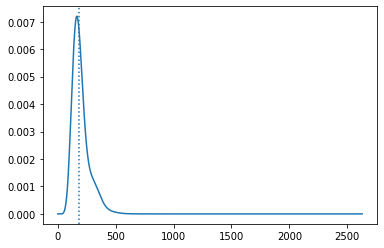

In [228]:
nuc = dm.Nucleus.Create("Xe131")
energies = np.r_[:240]
sigma = np.array([xsection.dSigmadEr_cm2_keV(er, mass*.5, nuc) for er in energies])
sigma /= np.sum(sigma)
sigma2 = sigma.copy()
for n in range(10):
    sigma2 = np.convolve(sigma2, sigma, 'full')
# plt.plot(sigma)
plt.plot( sigma2)
meanE = np.average(energies, weights = sigma)
plt.axvline(meanE*10, ls= ':')

In [14]:
plt.plot(energies, attens[0,:])
plt.plot(energies, attens[10,:])
plt.plot(energies, attens[30,:])

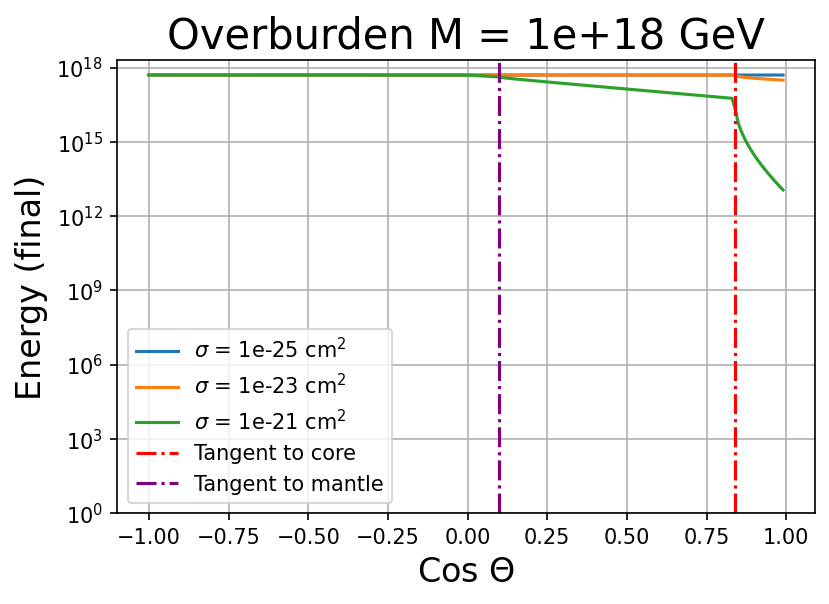

In [3]:
import itertools

shield = dm.EarthShield()

# depth = 4850/5280 *1.609
depth = 2
angle = -1
masses = np.logspace(12, 19, 500, base = 10)
sigmas = np.logspace(-33, -18,500,  base = 10)
parameters = itertools.product(masses, sigmas)

attens = np.array(list(map(lambda x :
                             shield.get_log_atten(depth, angle, x[0], dm.SICrossSection(x[0], x[1]), .5*x[0]), parameters)))

parameters = itertools.product(masses, sigmas)
attens_below = np.array(list(map(lambda x :
                             shield.get_log_atten(depth, 1, x[0], dm.SICrossSection(x[0], x[1]), .5*x[0]), parameters)))

In [24]:
attens.shape

(200, 100)

In [25]:
energies.shape

(100,)

In [55]:
atten_energy = np.exp(attens)*energies
jac = (3e5)**2 / (mass*1e6 * velocities)
atten_energy *= f_v*jac

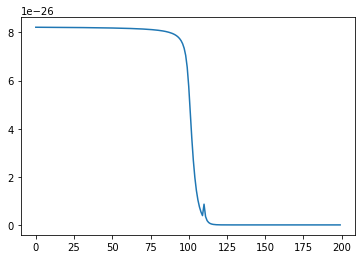

In [57]:
plt.plot(atten_energy[:,])

In [139]:
np.sum(f_v * np.diff(velocities, prepend = 0))

1.0166736268493475

In [169]:
np.sum( (g_v*jac2)[199,:] *np.diff(atten_velocities[199,:], append = 0))

0.993343579554825

In [48]:
atten_energy.shape

(200, 256)